In [1]:
import pandas as pd
import numpy as np
import requests
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.max_columns = 999

In [2]:
df = pd.read_csv('./CSVs/full_merged_data.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)

In [3]:
df.head()

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play
0,Average,105.8,0.499,0.157,0.291,20.4,105.8,0.499,0.157,0.291,20.4,2013,Average 2013,0.499,0.504,0.604,0.384,0.396,0.391,0.390,0.358,0.367,87.4,0.294,0.802,19.0,17.5,105.5,3.7,0.141,125.4,2.1,0.582,140.1,1.7,0.266,117.6
1,Oklahoma City,112.2,0.529,0.161,0.286,28.6,101.7,0.471,0.157,0.293,19.2,2013,Oklahoma City 2013,0.529,0.501,0.652,0.409,0.423,0.417,0.423,0.362,0.378,93.0,0.289,0.787,20.4,18.4,108.7,5.8,0.157,135.8,2.8,0.622,147.3,2.9,0.285,129.2
2,Miami,113.4,0.557,0.152,0.252,22.6,104.2,0.494,0.171,0.309,19.9,2013,Miami 2013,0.557,0.509,0.682,0.392,0.437,0.419,0.433,0.386,0.405,98.3,0.252,0.815,15.4,13.5,112.0,3.8,0.149,125.1,2.3,0.588,139.8,1.6,0.272,116.8
3,LA Clippers,111.5,0.529,0.160,0.315,20.4,103.7,0.496,0.177,0.294,22.9,2013,LA Clippers 2013,0.529,0.508,0.658,0.421,0.406,0.412,0.387,0.353,0.365,90.9,0.327,0.780,20.6,18.5,108.5,4.7,0.171,126.1,2.9,0.636,143.5,1.8,0.294,116.9
4,San Antonio,108.0,0.531,0.154,0.232,20.6,101.1,0.482,0.156,0.271,18.0,2013,San Antonio 2013,0.532,0.509,0.634,0.417,0.425,0.421,0.412,0.360,0.379,95.1,0.235,0.820,13.4,12.3,106.8,2.6,0.145,117.3,1.9,0.573,134.6,0.7,0.263,107.3


### KMeans Clustering Model

In [4]:
# Define X
X = df.select_dtypes(include=np.number) # only numeric columns

In [5]:
# Scale the data
ss = StandardScaler()                          
X_scaled = ss.fit_transform(X)

In [6]:
km = KMeans(n_clusters = 4, random_state=42)
km.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

C:\Users\aorfa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


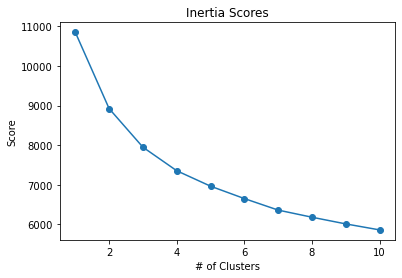

In [7]:
# at which point is our elbow?  Seems to be around 3

inertia_list = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_list.append(kmeans.inertia_)
    
plt.plot(range(1, 11), inertia_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Inertia Scores');

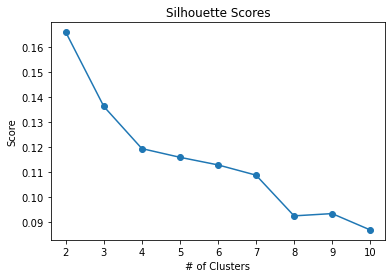

In [8]:
silhouette_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_list.append(silhouette_score(X_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_list, marker='o')
plt.xlabel('# of Clusters')
plt.ylabel('Score')
plt.title('Silhouette Scores');

### Post-Model EDA

In [9]:
# Add cluster label to each record
df['cluster'] = km.labels_
df.head(3)

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,cluster
0,Average,105.8,0.499,0.157,0.291,20.4,105.8,0.499,0.157,0.291,20.4,2013,Average 2013,0.499,0.504,0.604,0.384,0.396,0.391,0.390,0.358,0.367,87.4,0.294,0.802,19.0,17.5,105.5,3.7,0.141,125.4,2.1,0.582,140.1,1.7,0.266,117.6,2
1,Oklahoma City,112.2,0.529,0.161,0.286,28.6,101.7,0.471,0.157,0.293,19.2,2013,Oklahoma City 2013,0.529,0.501,0.652,0.409,0.423,0.417,0.423,0.362,0.378,93.0,0.289,0.787,20.4,18.4,108.7,5.8,0.157,135.8,2.8,0.622,147.3,2.9,0.285,129.2,2
2,Miami,113.4,0.557,0.152,0.252,22.6,104.2,0.494,0.171,0.309,19.9,2013,Miami 2013,0.557,0.509,0.682,0.392,0.437,0.419,0.433,0.386,0.405,98.3,0.252,0.815,15.4,13.5,112.0,3.8,0.149,125.1,2.3,0.588,139.8,1.6,0.272,116.8,1


In [10]:
df['cluster'].value_counts(normalize = True)

1    0.267742
3    0.267742
0    0.248387
2    0.216129
Name: cluster, dtype: float64

In [11]:
# Add column called "made_finals", "won_championship" columns

df['won_championship'] = 0
df.loc[[2],'won_championship'] = 1 #2013 Miami Heat
df.loc[[32],'won_championship'] = 1 #2014 San Antonio Spurs
df.loc[[63],'won_championship'] = 1 #2015 Golden State Warriors
df.loc[[97],'won_championship'] = 1 #2016 Cleveland Cavaliers
df.loc[[125],'won_championship'] = 1 #2017 Golden State Warriors
df.loc[[158],'won_championship'] = 1 #2018 Golden State Warriors
df.loc[[190],'won_championship'] = 1 #2019 Toronto Raptors
df.loc[[222],'won_championship'] = 1 #2020 Los Angeles Lakers
df.loc[[253],'won_championship'] = 1 #2021 Milwaukee Bucks

df['made_finals'] = 0
df.loc[[2], 'made_finals'] = 1 #2013 Miami Heat
df.loc[[4], 'made_finals'] = 1 #2013 San Antonio Spurs
df.loc[[32], 'made_finals'] = 1 #2014 San Antonio Spurs
df.loc[[36], 'made_finals'] = 1 # 2014 Miami Heat
df.loc[[63], 'made_finals'] = 1 #2015 Golden State Warriors
df.loc[[67], 'made_finals'] = 1 #2015 Cleveland Cavaliers
df.loc[[97], 'made_finals'] = 1 #2016 Cleveland Cavaliers
df.loc[[95], 'made_finals'] = 1 #2016 Golden State Warriors
df.loc[[125], 'made_finals'] = 1 #2017 Golden State Warriors
df.loc[[130], 'made_finals'] = 1 #2017 Cleveland Cavaliers
df.loc[[158], 'made_finals'] = 1 #2018 Golden State Warriors
df.loc[[170], 'made_finals'] = 1 #2018 Cleveland Cavaliers
df.loc[[190], 'made_finals'] = 1 #2019 Toronto Raptors
df.loc[[188], 'made_finals'] = 1 #2019 Golden State Warriors
df.loc[[222], 'made_finals'] = 1 #2020 Los Angeles Lakers
df.loc[[224], 'made_finals'] = 1 #2020 Miami Heat
df.loc[[253], 'made_finals'] = 1 #2021 Milwaukee Bucks
df.loc[[251], 'made_finals'] = 1 #2021 Phoenix Suns

In [12]:
df.head()

,Team,OFFENSE: Pts/Poss,OFFENSE: eFG%,OFFENSE: TOV%,OFFENSE: ORB%,OFFENSE: FT Rate,DEFENSE: Pts/Poss,DEFENSE: eFG%,DEFENSE: TOV%,DEFENSE: ORB%,DEFENSE: FT Rate,year,team_year,eFG%,Loc eFG%,Accuracy at Rim,Accuracy on Short Midrange,Accuracy on Long Midrange,Accuracy on All Midrange,Accuracy on Corner Threes,Accuracy on Non Corner Threes,Accuracy on All Threes,HALFCOURT: Pts/Play,HALFCOURT: OREB%,HALFCOURT: % of Plays,PUTBACKS: Pts/Miss,PUTBACKS: Plays/Miss,PUTBACKS: Pts/Play,ALL TRANSITION: Pts+/Poss,ALL TRANSITION: Freq,ALL TRANSITION: Pts/Play,OFF STEALS: Pts+/Poss,OFF STEALS: Freq,OFF STEALS: Pts/Play,OFF LIVE REBOUNDS: Pts+/Poss,OFF LIVE REBOUNDS: Freq,OFF LIVE REBOUNDS: Pts/Play,cluster,won_championship,made_finals
0,Average,105.8,0.499,0.157,0.291,20.4,105.8,0.499,0.157,0.291,20.4,2013,Average 2013,0.499,0.504,0.604,0.384,0.396,0.391,0.390,0.358,0.367,87.4,0.294,0.802,19.0,17.5,105.5,3.7,0.141,125.4,2.1,0.582,140.1,1.7,0.266,117.6,2,0,0
1,Oklahoma City,112.2,0.529,0.161,0.286,28.6,101.7,0.471,0.157,0.293,19.2,2013,Oklahoma City 2013,0.529,0.501,0.652,0.409,0.423,0.417,0.423,0.362,0.378,93.0,0.289,0.787,20.4,18.4,108.7,5.8,0.157,135.8,2.8,0.622,147.3,2.9,0.285,129.2,2,0,0
2,Miami,113.4,0.557,0.152,0.252,22.6,104.2,0.494,0.171,0.309,19.9,2013,Miami 2013,0.557,0.509,0.682,0.392,0.437,0.419,0.433,0.386,0.405,98.3,0.252,0.815,15.4,13.5,112.0,3.8,0.149,125.1,2.3,0.588,139.8,1.6,0.272,116.8,1,1,1
3,LA Clippers,111.5,0.529,0.160,0.315,20.4,103.7,0.496,0.177,0.294,22.9,2013,LA Clippers 2013,0.529,0.508,0.658,0.421,0.406,0.412,0.387,0.353,0.365,90.9,0.327,0.780,20.6,18.5,108.5,4.7,0.171,126.1,2.9,0.636,143.5,1.8,0.294,116.9,2,0,0
4,San Antonio,108.0,0.531,0.154,0.232,20.6,101.1,0.482,0.156,0.271,18.0,2013,San Antonio 2013,0.532,0.509,0.634,0.417,0.425,0.421,0.412,0.360,0.379,95.1,0.235,0.820,13.4,12.3,106.8,2.6,0.145,117.3,1.9,0.573,134.6,0.7,0.263,107.3,0,0,1


In [37]:
# Add "made_playoffs" column
playoffs_2013 = ['Miami 2013', 'Milwaukee 2013', 'Brooklyn 2013', 'Chicago 2013', 'Indiana 2013', 'Atlanta 2013', 'New York 2013', 'Boston 2013',
                 'Oklahoma City 2013', 'Houston 2013', 'LA Clippers 2013', 'Memphis 2013', 'Denver 2013', 'Golden State 2013', 'San Antonio 2013', 'LA Lakers 2013'] 
playoffs_2014 = ['Indiana 2014', 'Miami 2014', 'Toronto 2014', 'Chicago 2014', 'Washington 2014', 'Brooklyn 2014', 'Charlotte 2014', 'Atlanta 2014',
                 'San Antonio 2014', 'Oklahoma City 2014', 'LA Clippers 2014', 'Houston 2014', 'Portland 2014', 'Golden State 2014', 'Memphis 2014', 'Dallas 2014']
playoffs_2015 = ['Atlanta 2015', 'Brooklyn 2015', 'Toronto 2015', 'Washington 2015', 'Chicago 2015', 'Milwaukee 2015', 'Cleveland 2015', 'Boston 2015',
                'Golden State 2015', 'New Orleans 2015', 'Portland 2015', 'Memphis 2015', 'LA Clippers 2015', 'San Antonio 2015', 'Houston 2015', 'Dallas 2015']
playoffs_2016 = ['Cleveland 2016', 'Detroit 2016', 'Atlanta 2016', 'Boston 2016', 'Miami 2016', 'Charlotte 2016', 'Toronto 2016', 'Indiana 2016',
                'Golden State 2016', 'Houston 2016', 'LA Clippers 2016', 'Portland 2016', 'Oklahoma City 2016', 'Dallas 2016', 'San Antonio 2016', 'Memphis 2016']
playoffs_2017 = ['Boston 2017', 'Chicago 2017', 'Washington 2017', 'Atlanta 2017', 'Toronto 2017', 'Milwaukee 2017', 'Cleveland 2017', 'Indiana 2017',
                 'Golden State 2017', 'Portland 2017', 'LA Clippers 2017', 'Utah 2017', 'Houston 2017', 'Oklahoma City 2017', 'San Antonio 2017', 'Memphis 2017']
playoffs_2018 = ['Toronto 2018', 'Washington 2018', 'Cleveland 2018', 'Indiana 2018', 'Philadelphia 2018', 'Miami 2018', 'Boston 2018', 'Milwaukee 2018',
                'Houston 2018', 'Minnesota 2018', 'Oklahoma City 2018', 'Utah 2018', 'Portland 2018', 'New Orleans 2018', 'Golden State 2018', 'San Antonio 2018']
playoffs_2019 = ['Milwaukee 2019', 'Detroit 2019', 'Boston 2019', 'Indiana 2019', 'Philadelphia 2019', 'Brooklyn 2019', 'Toronto 2019', 'Orlando 2019',
                 'Golden State 2019', 'LA Clippers 2019', 'Houston 2019', 'Utah 2019', 'Portland 2019', 'Oklahoma City 2019', 'Denver 2019', 'San Antonio 2019']
playoffs_2020 = ['Milwaukee 2020', 'Orlando 2020', 'Indiana 2020', 'Miami 2020', 'Boston 2020', 'Philadelphia 2020', 'Toronto 2020', 'Brooklyn 2020',
                'LA Lakers 2020', 'Portland 2020', 'Houston 2020', 'Oklahoma City 2020', 'Denver 2020', 'Utah 2020', 'LA Clippers 2020', 'Dallas 2020']
playoffs_2021 = ['Philadelphia 2021', 'Washington 2021', 'New York 2021', 'Atlanta 2021', 'Milwaukee 2021', 'Miami 2021', 'Brooklyn 2021', 'Boston 2021',
                'Utah 2021', 'Memphis 2021', 'LA Clippers 2021', 'Dallas 2021', 'Denver 2021', 'Portland 2021', 'Phoenix 2021', 'LA Lakers 2021']

# create full list of all teams that made the playoffs
made_playoffs = playoffs_2013 + playoffs_2014 + playoffs_2015 + playoffs_2016 + playoffs_2017 + playoffs_2018 + playoffs_2019 + playoffs_2020 + playoffs_2021
# create new column 'made_playoffs' and insert a value of 1 for all teams that made it, and 0 for teams that didn't make it.
df['made_playoffs'] = np.where(df.team_year.isin(made_playoffs), 1, 0)

In [39]:
# now that we've got columns identifying team performance (playoffs, finals, championship), save to a new csv
df.to_csv('./CSVs/clusters_with_performance.csv')

In [11]:
df.groupby(by = 'cluster').mean().T

cluster,0,1,2,3
OFFENSE: Pts/Poss,106.264935,113.260241,105.928358,109.055422
OFFENSE: eFG%,0.506481,0.544169,0.496045,0.520000
OFFENSE: TOV%,0.146442,0.138988,0.157418,0.144602
OFFENSE: ORB%,0.255610,0.252325,0.296313,0.264000
OFFENSE: FT Rate,20.110390,20.221687,21.505970,19.327711
DEFENSE: Pts/Poss,106.875325,109.542169,106.741791,111.550602
DEFENSE: eFG%,0.506844,0.523494,0.503806,0.534241
DEFENSE: TOV%,0.148701,0.142964,0.154224,0.141205
DEFENSE: ORB%,0.268649,0.256916,0.284179,0.258494
DEFENSE: FT Rate,20.707792,19.491566,21.191045,19.756627
